## 파일 다루기
- 텍스트 파일 다운로드
- http://opentechschool.github.io/python-data-intro/files/radishsurvey.txt

In [ ]:
!curl http://opentechschool.github.io/python-data-intro/files/radishsurvey.txt\
    -o ./data/radishsurvey.txt

#!head -10 ./data/radishsurvey.txt
!type radishsurvey.txt

In [4]:
with open("./data/radishsurvey.txt") as file:
    for line in file:       
        line = line.strip()
        parts = line.split(" - ")
        name = parts[0]
        vote = parts[1]
        print(name + " voted for " + vote)

Evie Pulsford voted for April Cross
Matilda Condon voted for April Cross
Samantha Mansell voted for Champion
geronima trevisani voted for cherry belle
Alexandra Shoebridge voted for Snow Belle
Sarah Ahuia Ova voted for Snow Belle
Emma Slattery voted for Bunny Tail
Fabiana  Milanesi voted for Champion
Makayla McMinn voted for Snow Belle
Julian O'Leary voted for Sicily Giant
Hannah Collie voted for Bunny Tail
Toby Lundie voted for Plum Purple
Baldo Palerma voted for Champion
Phoebe Barwell voted for Plum Purple
Sheng Shen voted for Champion
Jonathan Rolph voted for Snow Belle
Aaron Yarnold voted for Red King
Indiana angwin voted for  Daikon
Luke Komine voted for White Icicle
Blake Ricardo voted for Daikon
Mikayla Biddell voted for Daikon
Piper Wheelwright voted for Bunny Tail
Bailey Derrington voted for White Icicle
Eufrosina Ferri voted for Daikon
Madeleine Abrahams voted for Daikon
Indiana Cowper voted for Sicily Giant
Procopio Zito voted for Red King
Ryan Langley voted for French Brea

In [7]:
line = line.strip()
line

'eliana baresi - white icicle'

In [6]:
parts = line.split(" - ")
parts

['eliana baresi', 'white icicle']

In [5]:
"1,2,3,4,5".split(",")

['1', '2', '3', '4', '5']

In [8]:
"cheese".split(",") # ,없음

['cheese']

In [ ]:
"Jin Li - White - Icicle".split(" - ")

In [ ]:
"Jin Li - White - Icicle".split("-")

In [9]:
with open("./data/radishsurvey.txt") as file:
    for line in file:
       line = line.strip()
       parts = line.split(" - ")
       name, vote = parts
       if vote == "White Icicle":
          print(name + " likes White Icicle!")

Luke Komine likes White Icicle!
Bailey Derrington likes White Icicle!
Tyler Forbes likes White Icicle!
Gianfranco Cremonesi likes White Icicle!
Tao Hsiao likes White Icicle!
Emily Walters likes White Icicle!
Thomas Oom likes White Icicle!
Stephanie Schnaars likes White Icicle!
Anna Denning likes White Icicle!
Ruby Fox likes White Icicle!
Ali Dedman likes White Icicle!
Sarah Milford likes White Icicle!
Hudson Dodgshun likes White Icicle!
Lara Salting likes White Icicle!
Amelie Farber likes White Icicle!
Isabella Pardey likes White Icicle!
Zhi Chin likes White Icicle!
Caitlyn Mullah likes White Icicle!
Taj Shackell likes White Icicle!
Xin Qian Shih likes White Icicle!
Abigail Clark likes White Icicle!
Bianca Knopwood likes White Icicle!
Mia Legg likes White Icicle!
Lilian Macquarie likes White Icicle!
Zachary Bass likes White Icicle!
Hayley Coverdale likes White Icicle!
David Moynihan likes White Icicle!
Angus De Mestre likes White Icicle!
Emily Plante likes White Icicle!
Kiara Maxwell-M

In [10]:
print("Counting votes for White Icicle...")
count = 0
with open("./data/radishsurvey.txt") as file:
    for line in file:       
        line = line.strip()
        name, vote = line.split(" - ")
        if vote == "White Icicle":
            count = count + 1
print(count)

Counting votes for White Icicle...
59


In [ ]:
name, cheese, cracker = "Fred,Jarlsberg,Rye".split(",")
print(cheese)

## 투표 결과 보기

In [ ]:
counts = {}

with open("./data/radishsurvey.txt") as file:
    for line in file:       
        line = line.strip()
        name, vote = line.split(" - ")
        if vote not in counts:
            # First vote for this variety
            counts[vote] = 1
        else:
            # Increment the vote count
            counts[vote] = counts[vote] + 1
print(counts)

In [ ]:
for name in counts:
    count = counts[name]
    print(name + ": " + str(count))

## 데이터 정제

In [ ]:
"""
Red King: 1
red king: 3
White Icicle: 1
 Cherry Belle: 2
daikon: 4
Cherry  Belle: 1
"""

In [11]:
counts = {}

with open("./data/radishsurvey.txt") as file:
    for line in file:
        line = line.strip()
        name, vote = line.split(" - ")

        # 수정한 부분
        vote = vote.strip().capitalize()
        if not vote in counts:
            # First vote for this variety
            counts[vote] = 1
        else:
            # Increment the vote count
            counts[vote] = counts[vote] + 1
print(counts)

{'April cross': 72, 'Champion': 76, 'Cherry belle': 57, 'Snow belle': 63, 'Bunny tail': 72, 'Sicily giant': 56, 'Plum purple': 56, 'Red king': 56, 'Daikon': 63, 'White icicle': 65, 'French breakfast': 72, 'Cherry  belle': 1, 'Plum  purple': 1, 'Sicily  giant': 1}


In [ ]:
"""
Sicily  giant: 1
Plum  purple: 1
Cherry  belle: 1
"""

In [ ]:
vote = vote.replace("  ", " ")

## 두 번 투표한 사람 찾기

In [12]:
counts = {}

# Create an empty list with the names of everyone who voted
voted = []

# Clean up (munge) a string so it's easy to match against other     strings
def clean_string(s):
    return s.strip().capitalize().replace("  "," ")

# Check if someone has voted already and return True or False
def has_already_voted(name):
    if name in voted:
        print(name + " has already voted! Fraud!")
        return True
    return False

# Count a vote for the radish variety named 'radish'
def count_vote(radish):
    if not radish in counts:
        # First vote for this variety
        counts[radish] = 1
    else:
        # Increment the radish count
        counts[radish] = counts[radish] + 1


with open("./data/radishsurvey.txt") as file:
    for line in file:
        line = line.strip()
        name, vote = line.split(" - ")
        name = clean_string(name)
        vote = clean_string(vote)
    
        if not has_already_voted(name):
            count_vote(vote)
        voted.append(name)

print("Results:")
print()
for name in counts:
    print(name + ": " + str(counts[name]))

Phoebe barwell has already voted! Fraud!
Procopio zito has already voted! Fraud!
Results:

April cross: 72
Champion: 76
Cherry belle: 58
Snow belle: 63
Bunny tail: 72
Sicily giant: 57
Plum purple: 56
Red king: 56
Daikon: 63
White icicle: 64
French breakfast: 72


In [ ]:
winner_name = "No winner"
winner_votes = 0

for name in counts:
    if counts[name] > winner_votes:
        winner_votes = counts[name]
        winner_name = name

print("The winner is: " + winner_name)

## 그래프 그리기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
names = []
votes = []
for radish in counts:
    names.append(radish)
    votes.append(counts[radish])

x = np.arange(len(counts))

plt.bar(x, votes)
plt.xticks(x + 0.5, names, rotation=90)
plt.show()

## 커피 파일
http://opentechschool.github.io/python-data-intro/files/coffee.csv

!curl http://opentechschool.github.io/python-data-intro/files/coffee.csv \
    -o ./data/coffee.csv

!head -10 ./data/coffee.csv

In [ ]:
import csv
f=open("./data/coffee.csv")
for row in csv.reader(f):
    print(row)

## 항공운항 데이터
https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat

In [ ]:
!curl https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat \
    -o ./data/airports.dat

!ls

In [13]:
# 공항 이름

import csv
f = open("./data/airports.dat", 'rt', encoding='UTF8')
for row in csv.reader(f):
        print(row[1])

Goroka Airport
Madang Airport
Mount Hagen Kagamuga Airport
Nadzab Airport
Port Moresby Jacksons International Airport
Wewak International Airport
Narsarsuaq Airport
Godthaab / Nuuk Airport
Kangerlussuaq Airport
Thule Air Base
Akureyri Airport
Egilsstaðir Airport
Hornafjörður Airport
Húsavík Airport
Ísafjörður Airport
Keflavik International Airport
Patreksfjörður Airport
Reykjavik Airport
Siglufjörður Airport
Vestmannaeyjar Airport
Sault Ste Marie Airport
Winnipeg / St. Andrews Airport
Halifax / CFB Shearwater Heliport
St. Anthony Airport
Tofino / Long Beach Airport
Kugaaruk Airport
Baie Comeau Airport
CFB Bagotville
Baker Lake Airport
Campbell River Airport
Brandon Municipal Airport
Cambridge Bay Airport
Nanaimo Airport
Castlegar/West Kootenay Regional Airport
Miramichi Airport
Charlo Airport
Kugluktuk Airport
Coronation Airport
Chilliwack Airport
Clyde River Airport
Coral Harbour Airport
Dawson City Airport
Burwash Airport
Princeton Airport
Deer Lake Airport
Dease Lake Airport
Dauphin

In [ ]:
f = open("./data/airports.dat", 'rt', encoding='UTF8')
for row in csv.reader(f):
    if row[3] == "Australia" or row[3] == "Russia":
        print(row[1])

## 경로 데이터
https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat

In [ ]:
!curl https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat \
    -o ./data/routes.dat

In [19]:
latitudes = {}
longitudes = {}
f = open("./data/airports.dat", 'rt', encoding='UTF8')
for row in csv.reader(f):
    airport_id = row[0]
    latitudes[airport_id] = float(row[6])
    longitudes[airport_id] = float(row[7])

In [ ]:
latitudes

!pip install geopy

In [28]:
from geopy.distance import great_circle, geodesic
great_circle((37, 127), (38, 129)) # 얼마나 멀리 있는지

Distance(208.54241590474152)

In [30]:
dist = geodesic((37, 127), (38, 129))
dist.miles

129.73269951916006

In [31]:
distances = []
f = open("./data/routes.dat")
for row in csv.reader(f):
    source_airport = row[3]
    dest_airport = row[5]
    if source_airport in latitudes and dest_airport in latitudes:
        source_lat = latitudes[source_airport]
        source_long = longitudes[source_airport]
        dest_lat = latitudes[dest_airport]
        dest_long = longitudes[dest_airport]
        distances.append(great_circle((source_lat,source_long),(dest_lat,dest_long)).km)

Text(0, 0.5, 'Number of flights')

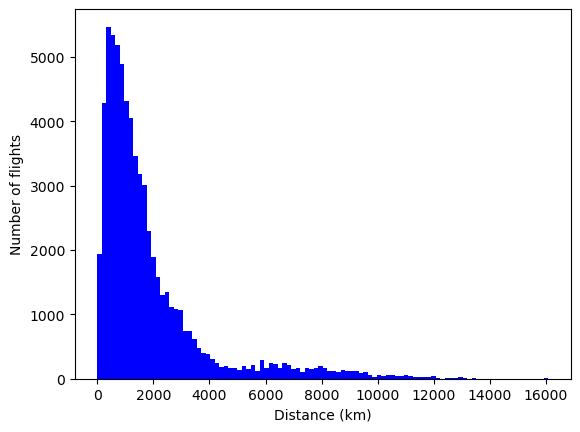

In [32]:
import matplotlib.pyplot as plt
plt.hist(distances, 100,facecolor='b')
plt.xlabel("Distance (km)")
plt.ylabel("Number of flights")

In [25]:
from geopy.geocoders import Nominatim
nom = Nominatim(user_agent = 'South Korea', timeout=None)
n = nom.geocode("London Tower")
print(n.latitude, n.longitude)
print(n.address)

62.9276526 -150.6445964
London Tower, Matanuska-Susitna Borough, Alaska, United States


In [36]:
n = nom.geocode("동아대학교")
print(n.latitude, n.longitude)
print(n.address)

35.1154117 128.9675937
동아대학교, 낙동대로520번길, 하단동, 하단2동, 사하구, 부산광역시, 49309, 대한민국


In [37]:
n = nom.geocode("서울대학교")
print(n.latitude, n.longitude)
print(n.address)

37.458115 126.9521607
서울대학교 관악캠퍼스, 1, 관악로, 서울대입구 삼성아파트, 대학동, 관악구, 서울특별시, 08826, 대한민국
